In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# 2.3.5

In [3]:
path = 'https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_train.csv'
df = pd.read_csv(path)
df.head()

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug
1,O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,35.20,electro_bug
2,d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,38.62,gear_stick
3,u29695600e,Mercedes-Benz GLC,business,petrol,4.04,2011,1263,2020,30.34,engine_fuel
4,N-8915870N,Renault Sandero,standart,petrol,4.70,2012,26428,2017,30.45,engine_fuel


In [4]:
# Второе место по числу поломок приходится на машины типа premium?
# НЕТ
pd.crosstab(df['target_class'], df['car_type']).sum()

car_type
business     117
economy     1536
premium       85
standart     599
dtype: int64

In [5]:
# У электрокара "MINI CooperSE" отсутствуют поломки типа "electro_bug"?
# ДА
pd.crosstab(df['target_class'], df[df['model'] == 'MINI CooperSE']['model'])

model,MINI CooperSE
target_class,
another_bug,6
break_bug,4
engine_check,3
engine_ignition,2
engine_overheat,4
gear_stick,2


In [6]:
# Модель машины "Nissan Qashqai" имеет максимальное число поломок класса "engine_ignition"?
# ДА
pd.crosstab(df['model'], df[df['target_class'] == 'engine_ignition']['target_class'])

target_class,engine_ignition
model,
Audi A3,2
Audi A4,2
Audi Q3,1
BMW 320i,3
Fiat 500,1
Hyundai Solaris,17
Kia Rio,12
Kia Rio X,20
Kia Rio X-line,14


In [7]:
# Поломка класса "engine_check" самая популярная среди всех?
# НЕТ
df['target_class'].value_counts()

target_class
engine_overheat    289
gear_stick         284
another_bug        279
engine_check       270
break_bug          270
engine_ignition    269
engine_fuel        262
electro_bug        249
wheel_shake        165
Name: count, dtype: int64

In [8]:
# Поломка "wheel_shake" в основном случалась в сегменте машин типа "standart"?
# НЕТ
pd.crosstab(df['car_type'], df[df['target_class'] == 'wheel_shake']['target_class'])

target_class,wheel_shake
car_type,
economy,165


In [9]:
df[df['target_class'] == 'wheel_shake']['car_type'].unique()

array(['economy'], dtype=object)

In [10]:
# Вид поломки "wheel_shake" меньше остальных представлен среди моделей машин?
df['target_class'].value_counts()

target_class
engine_overheat    289
gear_stick         284
another_bug        279
engine_check       270
break_bug          270
engine_ignition    269
engine_fuel        262
electro_bug        249
wheel_shake        165
Name: count, dtype: int64

In [11]:
pd.crosstab(
    df["target_class"],
    df["car_type"],
    # margins = True,
    # normalize = True
)  # .style.background_gradient(cmap="RdYlGn")

car_type,business,economy,premium,standart
target_class,,,,
another_bug,13,179,11,76
break_bug,14,177,9,70
electro_bug,12,165,16,56
engine_check,21,175,8,66
engine_fuel,10,157,13,82
engine_ignition,9,173,8,79
engine_overheat,23,165,11,90
gear_stick,15,180,9,80
wheel_shake,0,165,0,0


# 2.3.6

In [12]:
df = pd.read_csv('../data/rides_info.csv')
corr = df.corr(numeric_only=True).round(2)

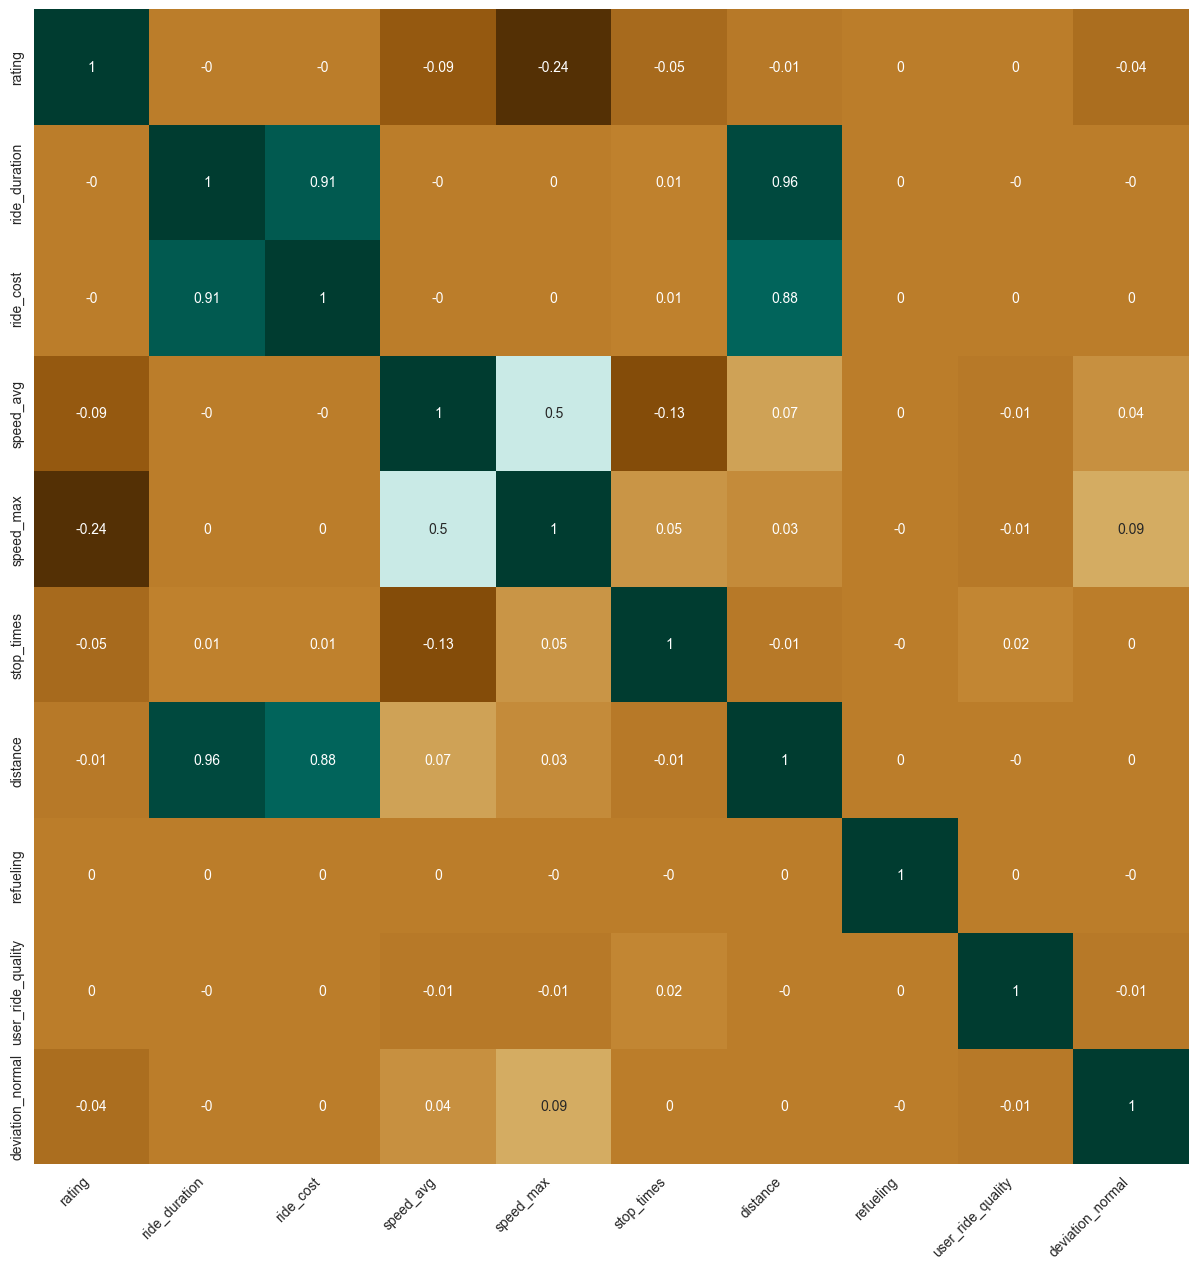

In [13]:
plt.rcParams['figure.figsize'] = (15, 15)
g = sns.heatmap(corr, square=True, annot=True, cmap='BrBG', cbar=False)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

In [14]:
plt.rcParams['figure.figsize'] = (25, 25)
corr.style.background_gradient(cmap='BrBG')

,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
rating,1.000000,-0.000000,-0.000000,-0.090000,-0.240000,-0.050000,-0.010000,0.000000,0.000000,-0.040000
ride_duration,-0.000000,1.000000,0.910000,-0.000000,0.000000,0.010000,0.960000,0.000000,-0.000000,-0.000000
ride_cost,-0.000000,0.910000,1.000000,-0.000000,0.000000,0.010000,0.880000,0.000000,0.000000,0.000000
speed_avg,-0.090000,-0.000000,-0.000000,1.000000,0.500000,-0.130000,0.070000,0.000000,-0.010000,0.040000
speed_max,-0.240000,0.000000,0.000000,0.500000,1.000000,0.050000,0.030000,-0.000000,-0.010000,0.090000
stop_times,-0.050000,0.010000,0.010000,-0.130000,0.050000,1.000000,-0.010000,-0.000000,0.020000,0.000000
distance,-0.010000,0.960000,0.880000,0.070000,0.030000,-0.010000,1.000000,0.000000,-0.000000,0.000000
refueling,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000
user_ride_quality,0.000000,-0.000000,0.000000,-0.010000,-0.010000,0.020000,-0.000000,0.000000,1.000000,-0.010000
deviation_normal,-0.040000,-0.000000,0.000000,0.040000,0.090000,0.000000,0.000000,-0.000000,-0.010000,1.000000


In [15]:
plt.rcParams['figure.figsize'] = (25, 25)
ct = pd.crosstab(df['target_class'], df['model'], normalize=True).round(4)
heatmap = sns.heatmap(ct, annot=True, square=True, cmap='BrBG', cbar_kws={'fraction': 0.01}, linewidth=1)

KeyError: 'target_class'

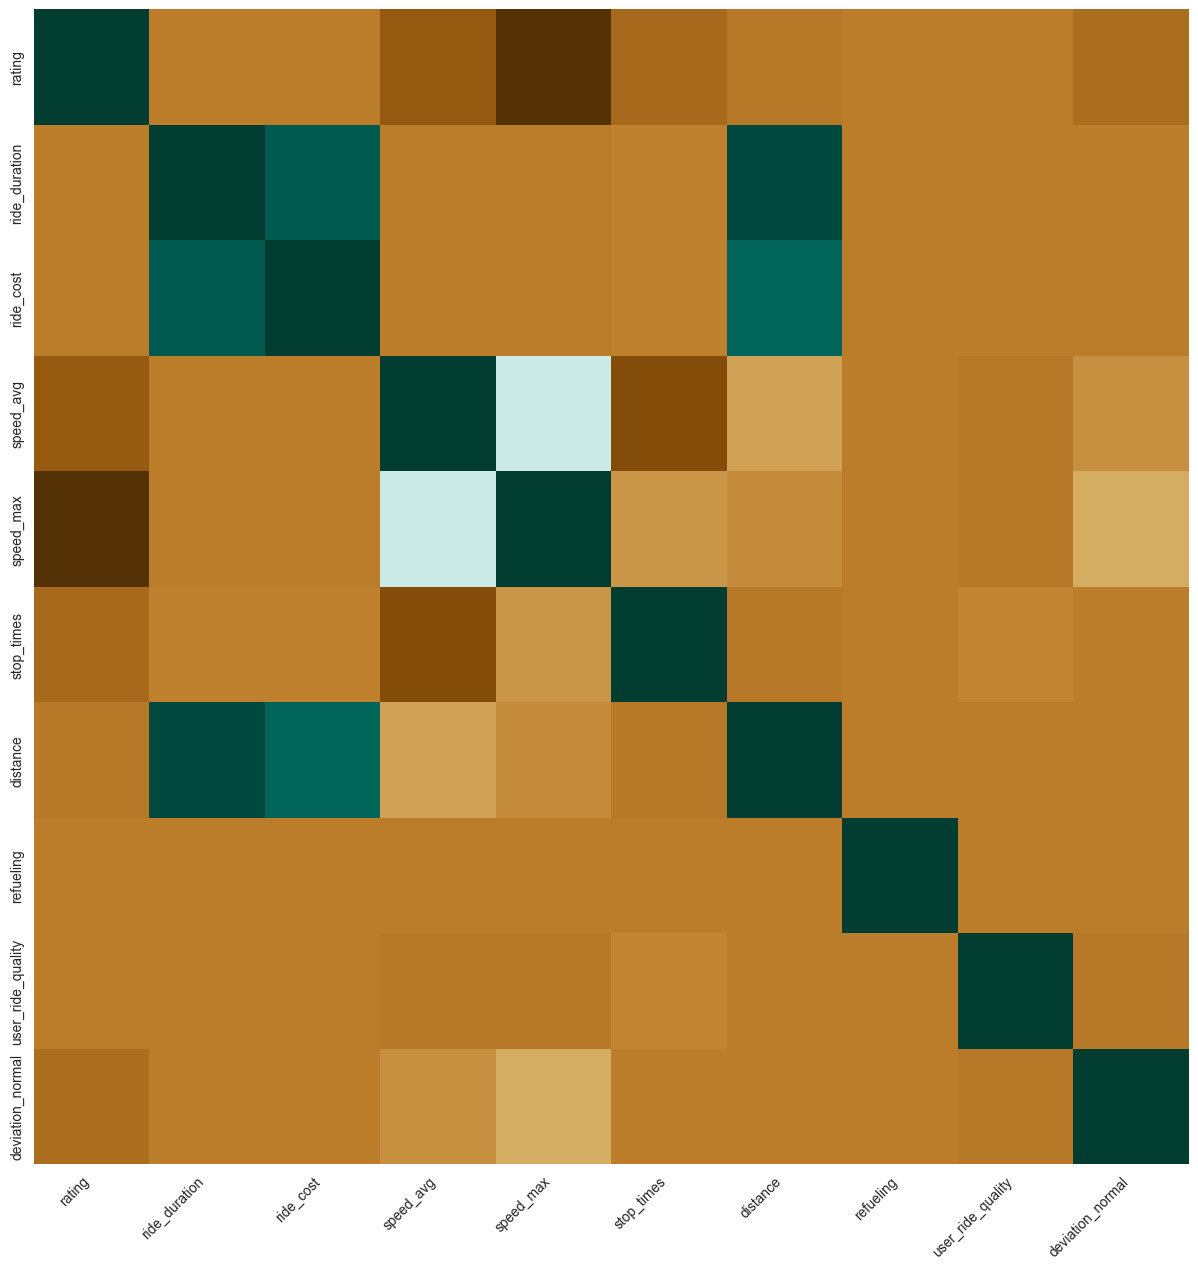

In [16]:
plt.rcParams['figure.figsize'] = (15, 15)
g = sns.heatmap(corr, square=True, cmap='BrBG', cbar=False)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

# 2.3.7

In [17]:
rides_info = pd.read_csv("../data/rides_info.csv")
cars = pd.read_csv("../data/car_train.csv")
driver_info = pd.read_csv("../data/driver_info.csv")

rides_info = rides_info.merge(cars, on="car_id", how="right")
rides_info = rides_info.merge(driver_info, on="user_id", how="left")

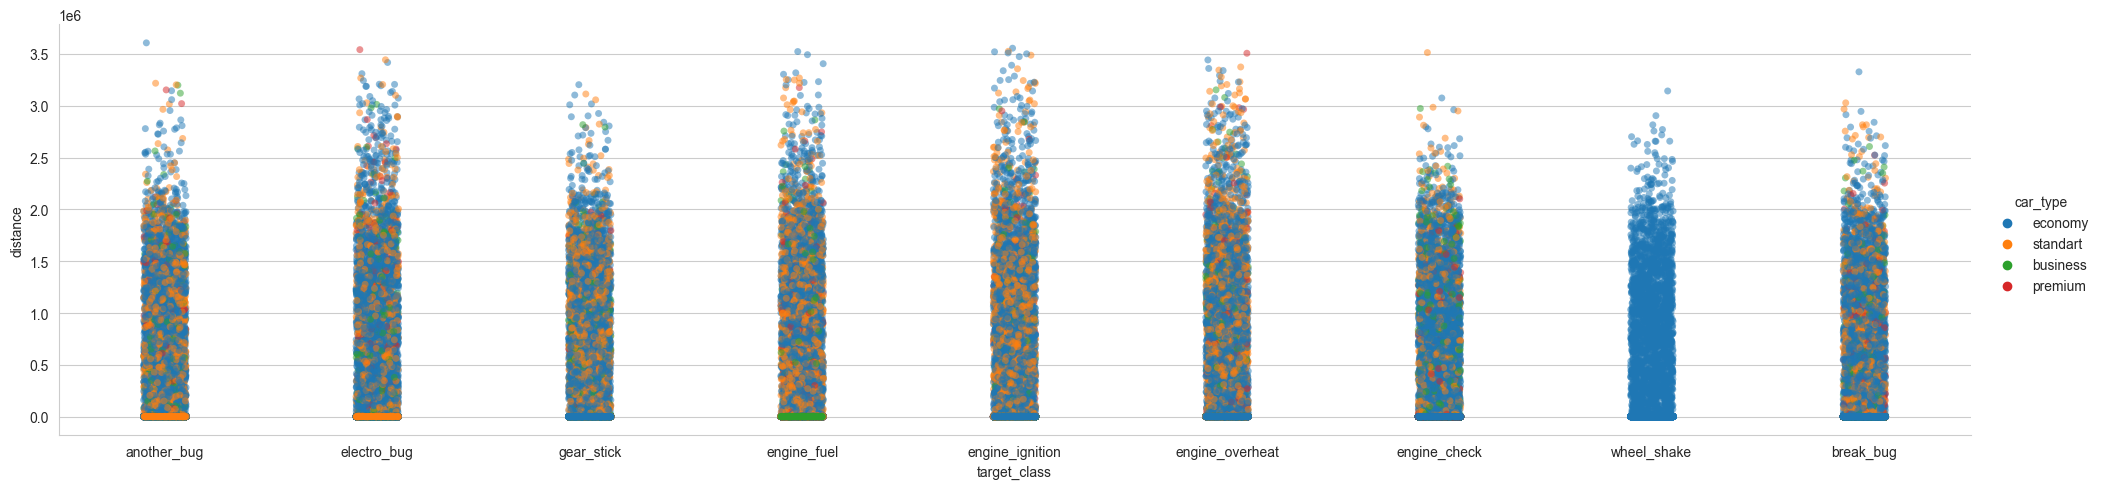

In [18]:
sns.catplot(data=rides_info,
            x='target_class',
            y='distance',
            hue='car_type',
            aspect=4,
            alpha=0.5,
            orient='v'
            );

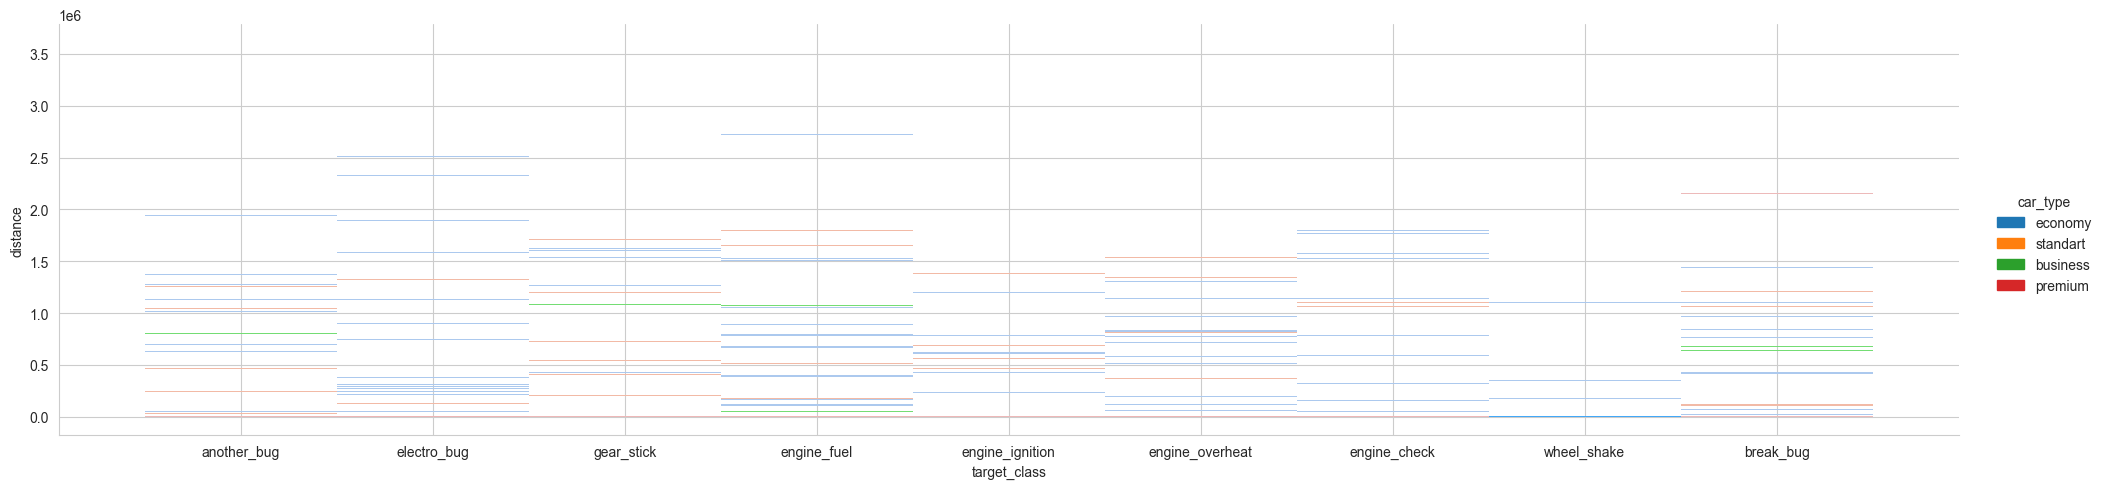

In [19]:
sns.displot(data=rides_info,
            kind='hist',
            x='target_class',
            y='distance',
            aspect=4,
            hue='car_type',
            );

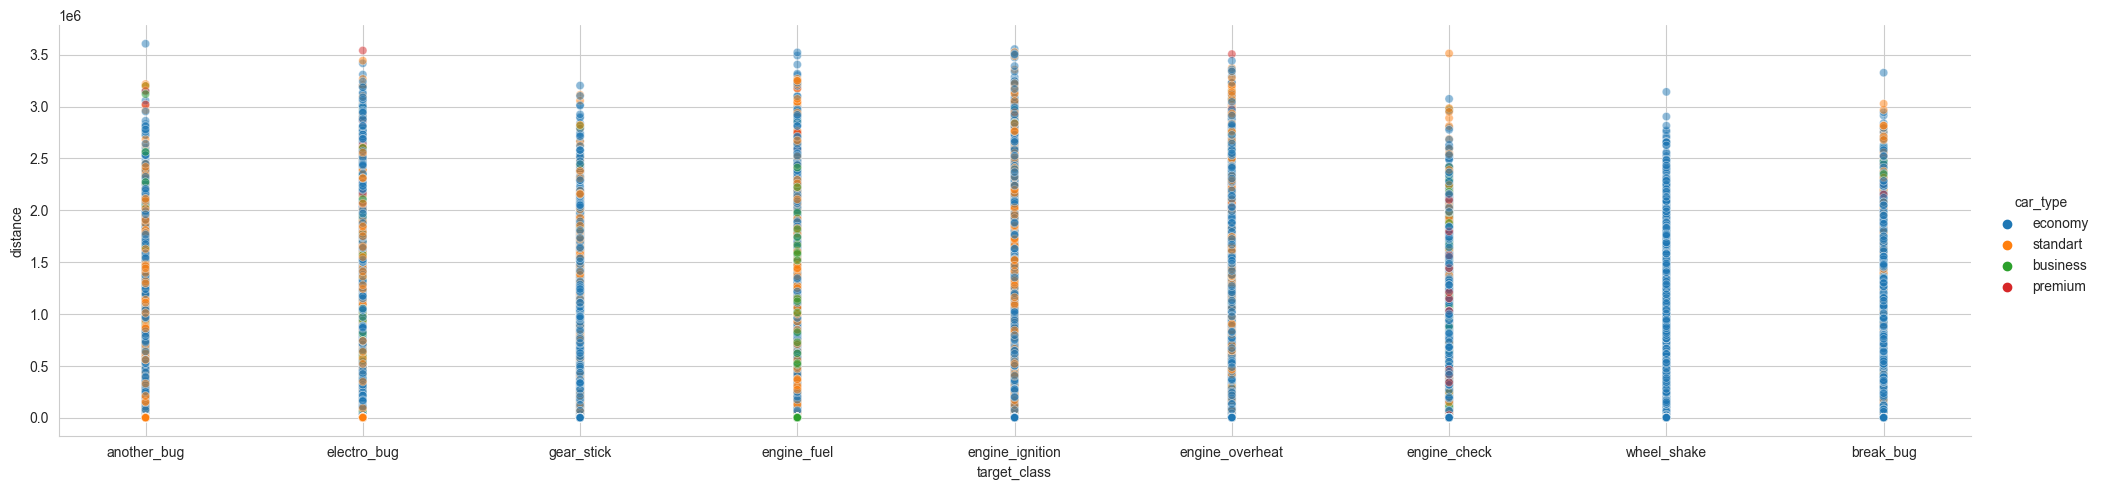

In [20]:
sns.relplot(data=rides_info,
            kind='scatter',
            x='target_class',
            y='distance',
            aspect=4,
            alpha=0.5,
            hue='car_type',
            );

# 2.3.8

In [21]:
rides_info = pd.read_csv(
    "https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/rides_info.csv")
cars = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_train.csv")
driver_info = pd.read_csv(
    "https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/driver_info.csv")

rides_info = rides_info.merge(cars, on="car_id", how="right")
rides_info = rides_info.merge(driver_info, on="user_id", how="left")

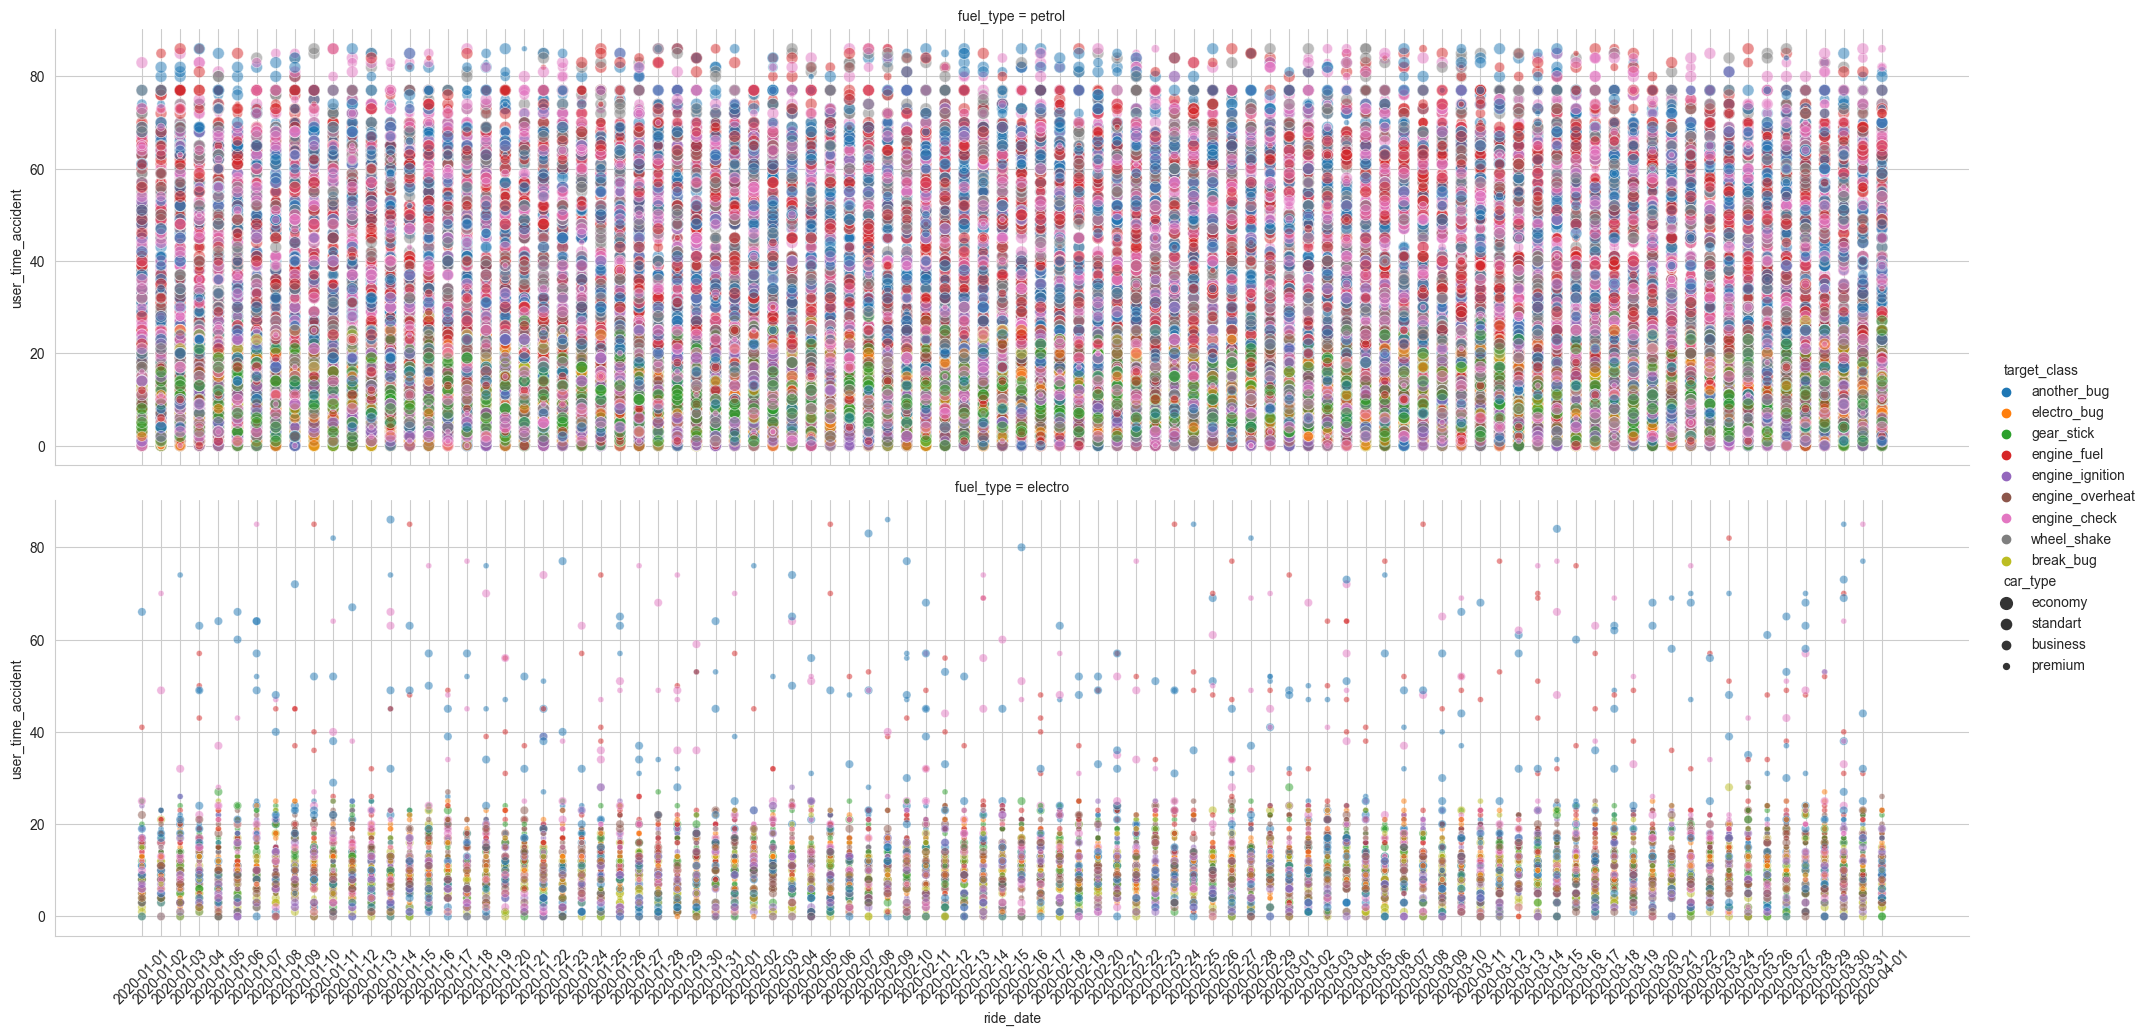

In [26]:
params = {
    'data': rides_info,
    'kind': 'scatter',
    'x': 'ride_date',
    'y': 'user_time_accident',
    'row': 'fuel_type',
    # 'size': 10,
    'legend': 'full',
    'aspect': 4,
    'alpha': 0.5}

g = sns.relplot(**params)
plt.xticks(rotation=45);